In [1]:
import seaborn as sns

titanic = sns.load_dataset("titanic")

seaborn은 maplotlib처럼 시각화 라이브러리
saeborn을 사용하면 더 간결하고, 기본 설정에서의 그래프가 좀 더 정결함

# 수치형 데이터 시각화

수치형 데이터는 일정한 범위 내에서 어떻게 분포(Distribution)되어 있는지가 중요함
고르게 퍼져 있을 수도 있고, 특정 영역에 몰려 있을 수도 있음

이 분포를 알아야 데이터를 어떻게 변환(Transformation)할지, 어떻게 해석해서 활용할지 판단할 수 있음.

In [2]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


수치형 데이터: age, fare
범주형 데이터: sex, embarked, class

seaborn이 제공하는 주요 분포도 함수
- histplot(): 히스토그램
- kdeplot(): 커널밀도추정 함수 그래프
- displot(): 분포도
- rugplot(): 러그플롯

<Axes: xlabel='age', ylabel='Count'>

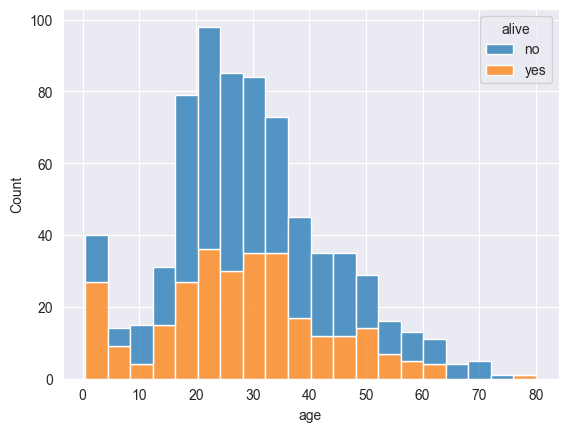

In [5]:
sns.histplot(data=titanic, x="age", bins=20, hue="alive", multiple="stack")

히스토그램(Histogram)은 수치형 데이터의 구간별 빈도수를 나타내는 그래프
histplot() 함수로 그릴 수 있음(위는 titanic 데이터의 age 피처에 대한 히스토그램)

Parameters: https://seaborn.pydata.org/generated/seaborn.histplot.html

<Axes: xlabel='age', ylabel='Density'>

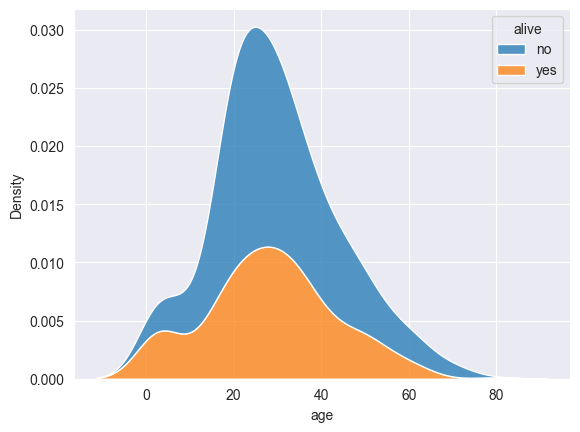

In [6]:
sns.kdeplot(data=titanic, x="age", hue="alive", multiple="stack")

커널밀도추정(Kernel Density Estimation)함수는 히스토그램을 매끄럽게 곡선으로 연결한 그래프 정도로 이해하면 편함
* 제대로 이해하려면 밀도추정과 커널 함수에 대해 알아야함

커널밀도추정함수 그래프는 kdeplot()로 그릴 수 있는데, 실제로 탐색적 데이터 분석 시 많이 쓰이지는 않음

Parameters: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

C:\Users\jwpar\Desktop\Kaggle\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


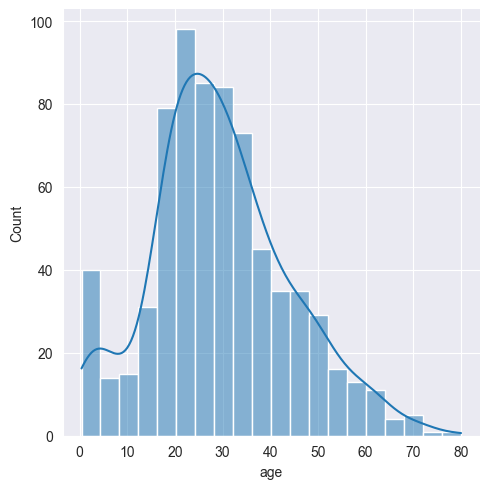

In [7]:
sns.displot(data=titanic, x="age", kde=True)

분포도는 수치형 데이터 하나의 분포를 나타내는 그래프임
Kaggle에서 분포도를 그릴 땐 displot()을 많이 사용함
파라미터만 조정하면 hisplot()과 kdeplot()이 제공하는 기본 그래프를 모두 그릴 수 있기 때문임

Parameters: https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

<Axes: xlabel='age', ylabel='Density'>

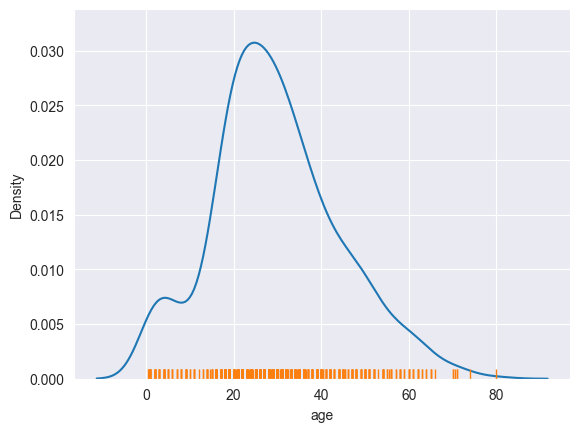

In [8]:
sns.kdeplot(data=titanic, x="age")
sns.rugplot(data=titanic, x="age")

러그플롯은 주변 분포(Marginal Distribution)를 나타내는 그래프
단독으로 사용하기보다는 주로 다른 분포도 그래프와 함께 사용함(위는 커널밀도추정함수 그래프와 같이 사용한 것)

위 그래프를 보면 알 수 있다시피, 단일 피처(여기서는 age)가 어떻게 분포되어 있는지를 x축 위에 작은 선분(러그)으로 표시함
값이 밀집되어 있을수록 작은 선분들도 밀집되어 있음을 알 수 있음

# 범주형 데이터 시각화

<Axes: xlabel='class', ylabel='fare'>

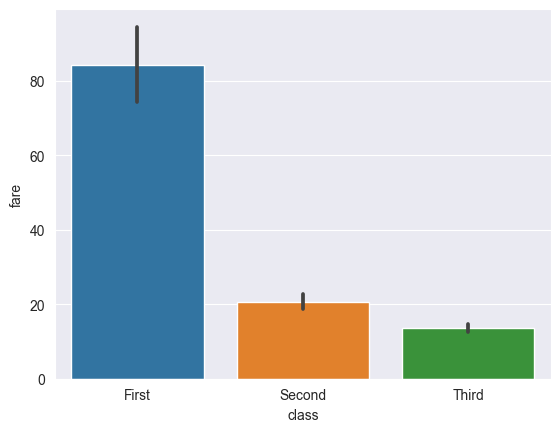

In [9]:
sns.barplot(data=titanic, x="class", y="fare")

막대 그래프는 범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악할 떄 상요함
barplot()으로 그릴 수 있음

barplot()은 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 그려줌
수치형 데이터 평균은 막대 높이로, 신뢰구간은 오차 막대(Error bar)로 표현함

원본 데이터를 복원 샘플링하여 얻은 표본을 활용하여 평균과 신뢰구간을 구하는 것
즉, barplot()은 원본 데이터 평균이 아니라 샘플링한 데이터 평균을 구하는 것임

기본적으로 x 파라미터에 범주형 뎅터를, y 파라미터에 수치형 데이터를 전달함 data 파라미터에 전체 데이터셋
위 그래프에서 막대의 높이는 등급별 평균 운임을 뜻함 검은색 세로줄은 오차 막대(신뢰구간)임
등급이 높을수록 평균 운임이 비싸고 신뢰구간이 넓어짐을 확인할 수 있음

Parameters: https://seaborn.pydata.org/generated/seaborn.barplot.html

<Axes: xlabel='class', ylabel='fare'>

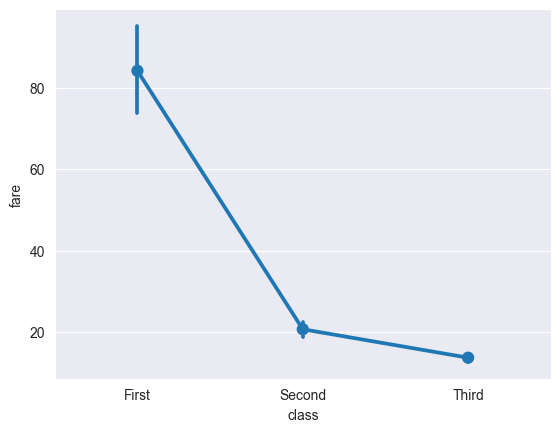

In [10]:
sns.pointplot(data=titanic, x="class", y="fare")

포인트플롯은 막대 그래프와 모양만 다를 뿐, 동일한 정보를 제공함
막대 그래프와 마찬가지로 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 나타냄
차이점이라면 그래플르 점과 선으로 나타낸다는 것?

보통 포인트 플롯은 한 화면에 여러 그래프를 그릴 때 사용하는 것이 좋음
포인트플롯은 점과 선으로 표현하기 때문에 한 화면에 여러 그래프를 그려도 서로 잘 보이고 비교하기도 쉬움

Parameters: https://seaborn.pydata.org/generated/seaborn.pointplot.html

<Axes: xlabel='class', ylabel='age'>

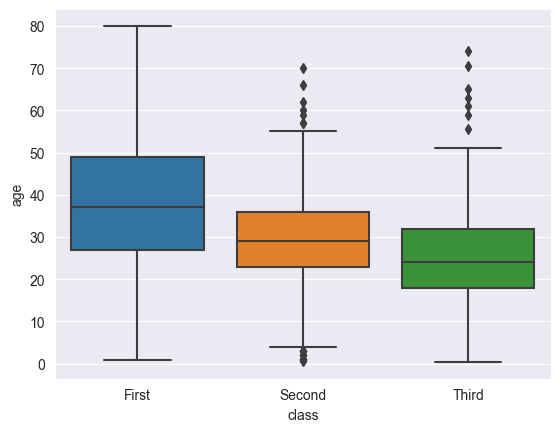

In [11]:
sns.boxplot(data=titanic, x="class", y="age")

박스플롯은 막대 그래프나 포인트플롯보다 더 많은 정보를, 구체적으로 5가지 요약 수치를 제공함
5가지 요약 수치(Five-number Summary)는 최솟값, 제1사분위 수(Q1), 제2사분위 수(Q2), 제3사분위 수(Q3), 최댓값을 뜻함

- 제1사분위 수(Q1): 전체 데이터 중 하위 25%에 해당하는 값
- 제2사분위 수(Q2): 50%에 해당하는 값(중앙값)
- 제3사분위 수(Q3): 상위 25%에 해당하는 값
- 사분위 범위 수(IQR): Q3 - Q1
- 최댓값: Q3 + (1.5 * IQR)
- 최솟값: Q1 - (1.5 * IQR)
- 이상치: 최댓값보다 큰 값과 최솟값보다 작은 값

See also: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQp8yR-n5M7XvZdlKECgTp6f8UsxIiynlCU4vM15bdWtA8GziGrU-mKEdQltXbz20dMLpc&usqp=CAU
Parameters: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: xlabel='class', ylabel='age'>

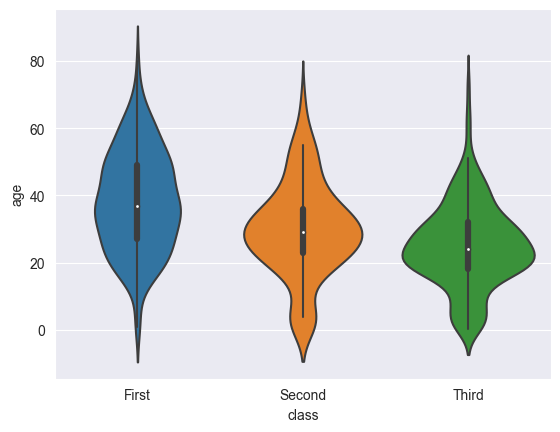

In [12]:
sns.violinplot(data=titanic, x="class", y="age")

바이올린플롯은 박스플롯과 커널밀도추정 함수 그래프를 합쳐 놓은 그래프라고 볼 수 있음
박스플롯이 제공하는 정보를 모두 포함하며, 모양은 커널밀도추정 함수 그래프 형태임

See also: https://blog.kakaocdn.net/dn/b0CIEt/btqCy3Aazjb/emj6zXRBK6UBUc8iolba81/img.png
Parameters: https://seaborn.pydata.org/generated/seaborn.violinplot.html

<Axes: xlabel='class', ylabel='age'>

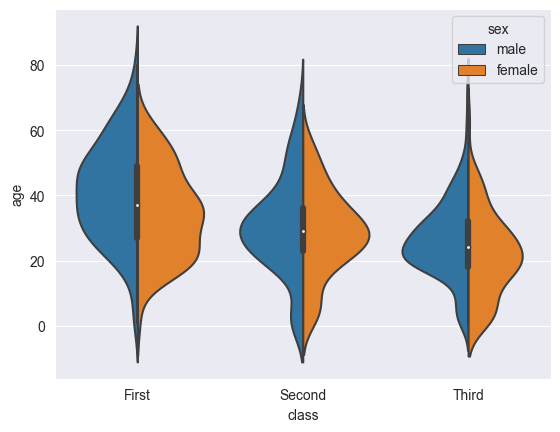

In [16]:
sns.violinplot(data=titanic, x="class", y="age", hue="sex", split=True)

박스플롯 그래프와 비교하여, 각 범주별로 5가지 요약 수치를 한눈에 보고 싶으면 박스 플롯이 좋을 것이고, 수치형 데이터의 전체적인 분포 양상을 보고 싶다면 바이올린 플롯이 더 좋음

<Axes: xlabel='class', ylabel='count'>

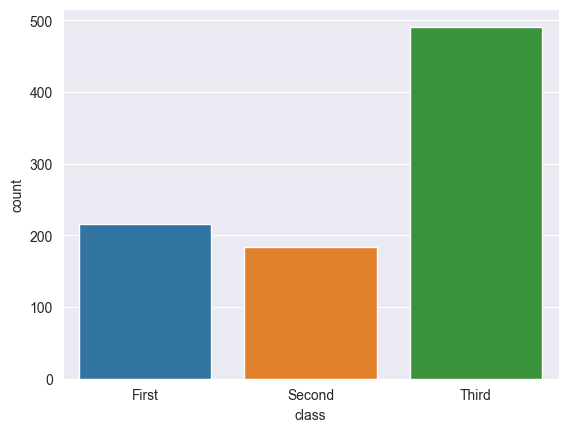

In [18]:
sns.countplot(data=titanic, x="class")

카운트플롯은 범주형 데이터의 개수를 확인할 때 사용하는 그래프임
주로 범주형 피처나 범주형 타깃값의 분포가 어떤지 파악하는 용도로 사용함

막대 그래프를 그려주는 barplot()과 카운트플롯을 그려주는 countplot()은 비슷해 보이지만 서로 다름
barplot()은 범주형 데이터별 수치형 데이터의 평균을 구해주기 때문에 피처를 두 개 받음
반면 countplot()은 피처를 범주형 데이터 하나만 받음

또한 estimator 파라미터를 통해 중앙값, 최댓값, 최솟값을 구할 수도 있음

Parameters: https://seaborn.pydata.org/generated/seaborn.countplot.html

([<matplotlib.patches.Wedge at 0x195b3df4190>,
 [Text(1.0461621663333946, 0.3399186987098808, 'A'),
  Text(-0.8899187482945419, 0.6465637025335369, 'B'),
  Text(0.6465639524941308, -0.8899185666875186, 'C')],
 [Text(0.5706339089091244, 0.1854101992962986, '10.0%'),
  Text(-0.4854102263424773, 0.3526711104728383, '60.0%'),
  Text(0.35267124681498035, -0.485410127284101, '30.0%')])

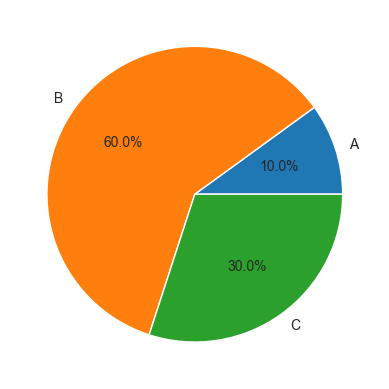

In [19]:
import matplotlib.pyplot as plt

x = [10, 60, 30] # 범주형 데이터별 파이 그래프의 부채꼴 크기(비율)
labels = ['A', 'B', 'C'] # 범주형 데이터 레이블

plt.pie(x=x, labels=labels, autopct="%.1f%%")

파이 그래프는 범주형 데이터별 비율을 알아볼 때 사용하기 좋은 그래프임
seaborn은 파이 그래프를 지원하지 않아 matplotlib을 사용해야함

파이 그래프는 pie() 함수로 그릴 수 있음

Parameters: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html

# 데이터 관계 시각화

관계도는 여러 데이터 사이의 관계를 살펴보기 위한 그래프임

In [20]:
import seaborn as sns

flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


히트맵은 데이터 간 관계를 색상으로 표현한 그래프임
비교해야 할 데이터가 많을 때 주로 사용하며, heatmap()함수를 이용함

flights 데이터에는 범주형 데이터 2개(year, month)와 수치형 데이터(passengers)가 있음

히트맵을 그리는 데 활용하려면 데이터 구조를 바꿔야함
pandas의 pivot() 함수를 활용할 것

pivot()함수는 index와 columns 파라미터에 전달한 피처를 각각 행과 열로 지정하고 values 파라미터에 전달한 피처를 합한 표를 반환함

각 연도의 월별 승객 수를 알기 위해 month를 행으로, year를 열로, 합산할 데이터를 passengers로 지정할 것

In [21]:
flights_pivot = flights.pivot(index="month",
                              columns="year",
                              values="passengers")

flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


각 연도의 월별 탑승자 수를 나타내는 표를 만드는 데 성공했음
하지만 숫자로만 나타내니 추이까지는 한눈에 파악하기 힘든데, 이럴 때 사용하는 그래프가 히트맵임
flights_pivot 데이터를 히트맵으로 변환 ㄱㄱ

<Axes: xlabel='year', ylabel='month'>

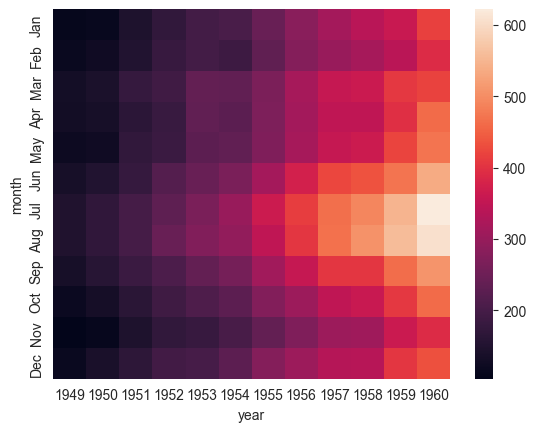

In [22]:
sns.heatmap(data=flights_pivot)

표로 볼 때 보다 의미를 파악하기가 훨씬 쉬워졌음을 알 수 있음

Paramters: https://seaborn.pydata.org/generated/seaborn.heatmap.html

<Axes: xlabel='year', ylabel='passengers'>

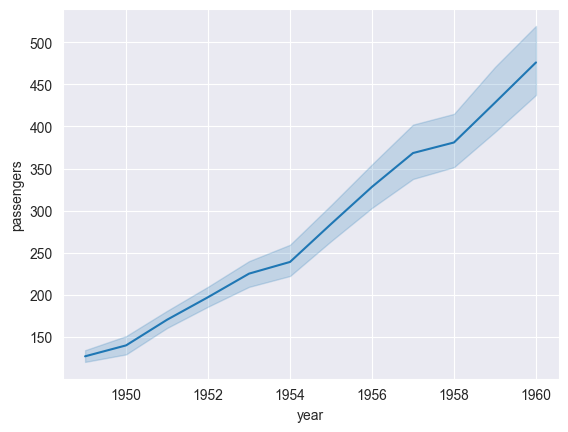

In [23]:
sns.lineplot(data=flights, x="year", y="passengers")

라인플롯은 두 수치형 데이터 사이의 관계를 나타낼 때 사용함
기본적으로는 x 파라미터에 전달한 값에 따라 y 파라미터에 전달한 값의 평균과 95% 신뢰구간을 나타냄

Paramters: https://seaborn.pydata.org/generated/seaborn.lineplot.html

In [24]:
tips = sns.load_dataset("tips") # 팁 데이터 불러오기
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


산점도는 두 데이터의 관계를 점으로 표현하는 그래프임

<Axes: xlabel='total_bill', ylabel='tip'>

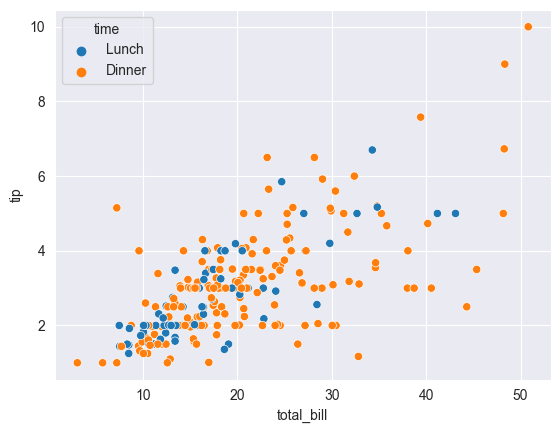

In [25]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")

hue 파라미터를 통해 산점도를 특정 범주형 데이터로 나누어 그릴 수 있음(위는 시간에 따라 나눠본 것)

Parameters: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

<Axes: xlabel='total_bill', ylabel='tip'>

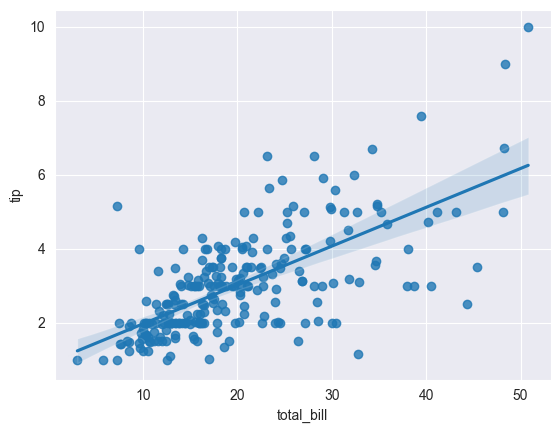

In [27]:
sns.regplot(data=tips, x="total_bill", y="tip")

regplot()은 산점도와 선형 회귀선을 동시에 그려주는 함수임
회귀선을 그리면 전반적인 상고나관계 파악이 좀 더 쉬움

선형 회귀선 주변 음영은 95% 신뢰구간을 의미함
신뢰구간을 조정하고 싶으면 ci 파라미터를 이용하면 됨